In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from env import user, password,host

def get_db_url(user,password,host,db_name):
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
url = get_db_url(user,password,host,'employees')

In [1]:
#1

#A bank found that the average number of cars waiting during the noon hour at 
#a drive-up window follows a Poisson distribution with a mean of 2 cars.
#Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
#What is the probability that no cars drive up in the noon hour?
#What is the probability that 3 or more cars come through the drive through?
#How likely is it that the drive through gets at least 1 car?

<BarContainer object of 10 artists>

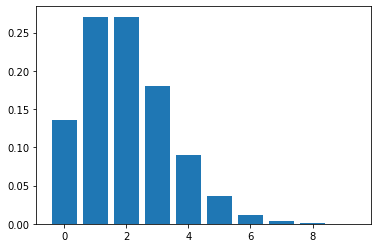

In [4]:
λ = 2
dis = stats.poisson(λ)

x = np.arange(0,10)
y = dis.pmf(x)

plt.bar(x,y)

In [5]:
#What is the probability that no cars drive up in the noon hour?
dis.pmf(0)

0.1353352832366127

In [6]:
#What is the probability that 3 or more cars come through the drive through?
dis.sf(2)

0.32332358381693654

In [8]:
#How likely is it that the drive through gets at least 1 car?
dis.sf(0)

0.8646647167633873

In [9]:
#2

#Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
#What grade point average is required to be in the top 5% of the graduating class?
#What GPA constitutes the bottom 15% of the class?
#An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
#Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
#If I have a GPA of 3.5, what percentile am I in?

In [15]:
mean = 3.0
std = .3
dis = stats.norm(mean, std)

In [18]:
#What grade point average is required to be in the top 5% of the graduating class?
dis.isf(.05)

3.4934560880854417

In [19]:
#What GPA constitutes the bottom 15% of the class?
dis.ppf(0.15)

2.689069983151863

In [22]:
#An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
#Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
scholorship = 2.8
dis.ppf(.2), dis.ppf(.3)

(2.7475136299281258, 2.842679846187588)

In [23]:
(scholorship >= dis.ppf(.2) and scholorship <= dis.ppf(.3))

True

In [36]:
#If I have a GPA of 3.5, what percentile am I in?
dis.sf(3.5)

0.0477903522728147

In [37]:
#3
#A marketing website has an average click-through rate of 2%.
#One day they observe 4326 visitors and 97 click-throughs. 
#How likely is it that this many people or more click through?

In [38]:
vis = 4326
click_avg = .02
dis = stats.binom(vis, click_avg)

In [41]:
#How likely is it that this many people or more click through?
dis.sf(96)

0.1397582363130086

In [43]:
#4 You are working on some statistics homework consisting of 100 
#questions where all of the answers are a probability rounded to the hundreths place.
#Looking to save time, you put down random probabilities as the answer to each question.
#What is the probability that at least one of your first 60 answers is correct?


In [62]:
questions = 60
answer_prob = .01

dis = stats.binom(questions,answer_prob)

In [63]:
dis.sf(0)

0.4528433576092388

In [64]:
#5
#The codeup staff tends to get upset when the student break area is not cleaned up.
#Suppose that there's a 3% chance that any one student cleans the break area when they visit it
#, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.
#How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [79]:
prob_of_cleanup = .03
active_students = 66
students_who_visit = (.90 * active_students)

dis = stats.binom(students_who_visit, prob_of_cleanup)

In [80]:
#How likely is it that the break area gets cleaned up each day?
dis.pmf(1)

0.3008686801329962

In [86]:
#How likely is it that it goes two days without getting cleaned up?
dis.sf(1)

0.5317140258060139

In [87]:
#All week?
dis.sf(4)

0.03192515170090832

In [88]:
#6
#You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime.
#After several weeks of careful observation, you notice that the average number of people in line when your
#lunch break starts is normally distributed with a mean of 15 and standard deviation of 3.
#If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
#what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
#Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [91]:
mean = 15
std = 3
dis = stats.norm(mean, std)


dis.sf(14)

0.6305586598182363

In [93]:
#7 Connect to the employees database and find the average salary of current employees, 
#along with the standard deviation. For the following questions,
#calculate the answer based on modeling the employees salaries with a 
#normal distribution defined by the calculated mean and standard deviation 
#then compare this answer to the actual values present in the salaries dataset.
    #What percent of employees earn less than 60,000?
    #What percent of employees earn more than 95,000?
    #What percent of employees earn between 65,000 and 80,000?
    #What do the top 5% of employees make?

In [105]:
salaries_df = pd.read_sql("select salary from salaries where to_date = '9999-01-01'",url)

In [106]:
salaries_df

,salary
0,88958
1,72527
2,43311
3,74057
4,94692
...,...
240119,52868
240120,69501
240121,83441
240122,55003


In [107]:
#using Normal distrabutions with mean and  standard deviation first
mean = salaries_df.salary.mean()
std = salaries_df.salary.std()
dis = stats.norm(mean, std)

In [125]:
#What percent of employees earn less than 60,000?
dis.cdf(59_999)

0.2438393099761686

In [126]:
 #What percent of employees earn more than 95,000?
dis.sf(95_000)

0.09208819199804053

In [144]:
#What percent of employees earn between 65,000 and 80,000?
((dis.cdf(80_000)) - dis.sf(65_000))

0.020466412445969473

In [128]:
#What do the top 5% of employees make?
dis.isf(.05)

100484.64454102777

In [129]:
#now solving with actual data from salaries dataframe

In [130]:
#What percent of employees earn less than 60,000?
salaries_df[salaries_df["salary"] < 60_000].count() / salaries_df.count()

salary    0.270573
dtype: float64

In [131]:
#What percent of employees earn more than 95,000?
salaries_df[salaries_df["salary"] > 95_000].count() / salaries_df.count()

salary    0.108627
dtype: float64

In [143]:
#What percent of employees earn between 65,000 and 80,000?
salaries_df[(salaries_df["salary"] < 80_000) & (salaries_df["salary"] > 65_000)].count() / salaries_df.count()

salary    0.325107
dtype: float64

In [151]:
#What do the top 5% of employees make?
salaries_df.quantile(0.95)

salary    104225.85
Name: 0.95, dtype: float64